## CMPINF 2100: Homework 10

### Arnab Dey Sarkar

## Assigned: Tuesday of Week 12 at 11:00PM

## DUE: Tuesday of Week 13 at 11:59PM

## Overview

This assignment is focused on BINARY CLASSIFICATION performance metrics. You will fit multiple LOGISTIC REGRESSION models for a BINARY CLASSIFICATION problem. You will interpret the models through their coefficients and examine the TRAINING set performance through multiple performance metrics. You will conclude the assignment by visualizing the EVENT PROBABILITY predictions to further help interpret model behavior.

**You must download the CSV file provided in the Canvas assignment page and save it to the appropriate directory on your computer.**

The data set consists of 4 inputs and a single BINARY OUTCOME. The input names all start with the letter `x` and the BINARY OUTCOME is named `y`.

You will perform a brief visual exploration at the start of the assignment. The bulk of the assignment is focused on fitting, predicting, and assessing the performance of the BINARY CLASSIFICATION models.  

### Collaborators

Type the names of other students you worked with here.


## Problem 00

### 00a)

You will work with the "big 4" modules of NumPy, Pandas, matplotlib.pyplot, and Seaborn in this assignment.   

Import NumPy, Pandas, matplotlib.pyplot, and Seaborn using their commonly accepted aliases.

#### 00a) - SOLUTION

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

### 00b)

You will use the statsmodels formula interface to fit the models in all problems. Import the statsmodels.formula.api using its common alias.

**ALL** models that you fit in this assignment will use the statsmodels formula interface!  

#### 00b) - SOLUTION

In [2]:
import statsmodels.formula.api as smf

### 00c)

This problem is completed for you. You will also use the following functions imported from scikit-learn. These functions streamline calculating certain BINARY CLASSIFICATION performance metrics.

In [3]:
from sklearn.metrics import confusion_matrix

from sklearn.metrics import roc_curve

from sklearn.metrics import roc_auc_score

### 00d)

This problem is completed for you. You may also use the following function which creates the COEFFICIENT PLOT from statsmodels model objects.

In [4]:
def my_coefplot(mod, figsize_use=(10, 4)):
    fig, ax = plt.subplots(figsize=figsize_use)
    
    ax.errorbar( y=mod.params.index,
                 x=mod.params,
                 xerr = 2 * mod.bse,
                 fmt='o', color='k', ecolor='k', elinewidth=2, ms=10)
    
    ax.axvline(x=0, linestyle='--', linewidth=3.5, color='grey')
    
    ax.set_xlabel('coefficient value')
    
    plt.show()

## Problem 01

You will begin with a brief exploration of the data. This is not an exhaustive exploration. It is focused on the information and figures that directly help with fitting LOGISTIC REGRESSION models to predict the EVENT PROBABILITY given the inputs.

### 1a)

Read in the `hw10_binary.csv` CSV file and assign it to the `df` object.

What are the data types for the columns?

#### 1a) - SOLUTION

In [6]:
df = pd.read_csv("hw10_binary.csv")

### 1b)

How many unique values are associated with each column?

#### 1b) - SOLUTION

In [10]:
df.nunique()

x1    333
x2    333
x3      3
x4      3
y       2
dtype: int64

### 1c)

Are the categories of the BINARY OUTCOME roughly balanced? Display the PROPORTION for each BINARY OUTCOME category to the screen.

#### 1c) - SOLUTION

In [11]:
df.y.value_counts(normalize=True)

0    0.534535
1    0.465465
Name: y, dtype: float64

yes, roughly balanced.

### 1d)

Create bar charts to visualize the counts for each categorical input.

Are the categories of the categorical inputs roughly balanced?

#### 1d) - SOLUTION

In [13]:
df.dtypes

x1    float64
x2    float64
x3     object
x4     object
y       int64
dtype: object

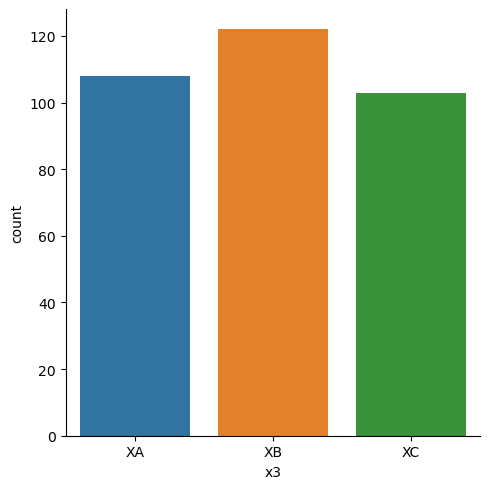

In [15]:
sns.catplot(data = df, kind = 'count', x = 'x3')

plt.show()

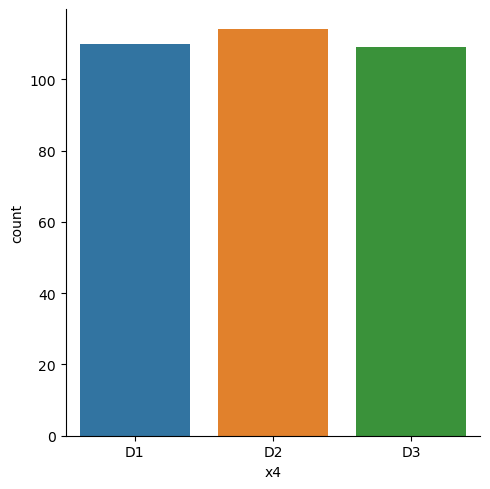

In [16]:
sns.catplot(data = df, kind = 'count', x = 'x4')

plt.show()

yes, roughly balanced.

### 1e)

Let's visualize the relationship between the BINARY OUTCOME and the continuous inputs.

Create a TREND PLOT to visualize the relationship between the BINARY OUTCOME and each continuous input. You MUST CHANGE the arguments to the TREND PLOT function so that a LOGISTIC REGRESSION trend line is used instead of the DEFAULT LINEAR REGRESSION trend line. 

You may RESHAPE the data set to LONG-FORMAT to create a single TREND PLOT for all continuous inputs using facets. Or, you may create separate TREND PLOTS for each input. The choice is yours.

#### 1e) - SOLUTION

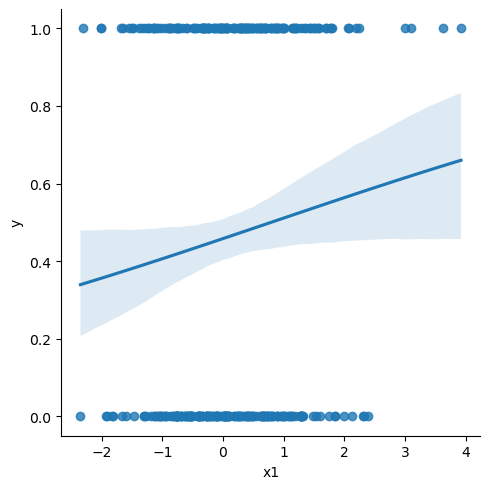

In [18]:
sns.lmplot(data= df, x = 'x1', y = 'y', logistic= True)

plt.show()

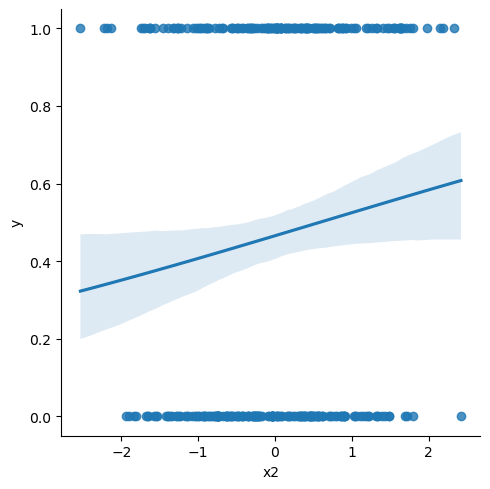

In [19]:
sns.lmplot(data= df, x = 'x2', y = 'y', logistic= True)

plt.show()

### 1f)

Let's examine the relationship between the BINARY OUTCOME and the continuous inputs GROUPED BY the COMBINATIONS categorical inputs.

Create a TREND PLOT to visualize the relationship between the BINARY OUTCOME and each continuous input. You MUST CHANGE the arguments to the TREND PLOT function so that a LOGISTIC REGRESSION trend line is used instead of the DEFAULT LINEAR REGRESSION trend line. You MUST set the arguments to the TREND PLOT so that horizontal (column) facets are associated with `x3` and the vertical (row) facets are associated with `x4`.

You should create one figure for each input and therefore is easier to create the figure using the WIDE-FORMAT data. Thus, you should create one faceted figure for each continuous input.

#### 1f) - SOLUTION

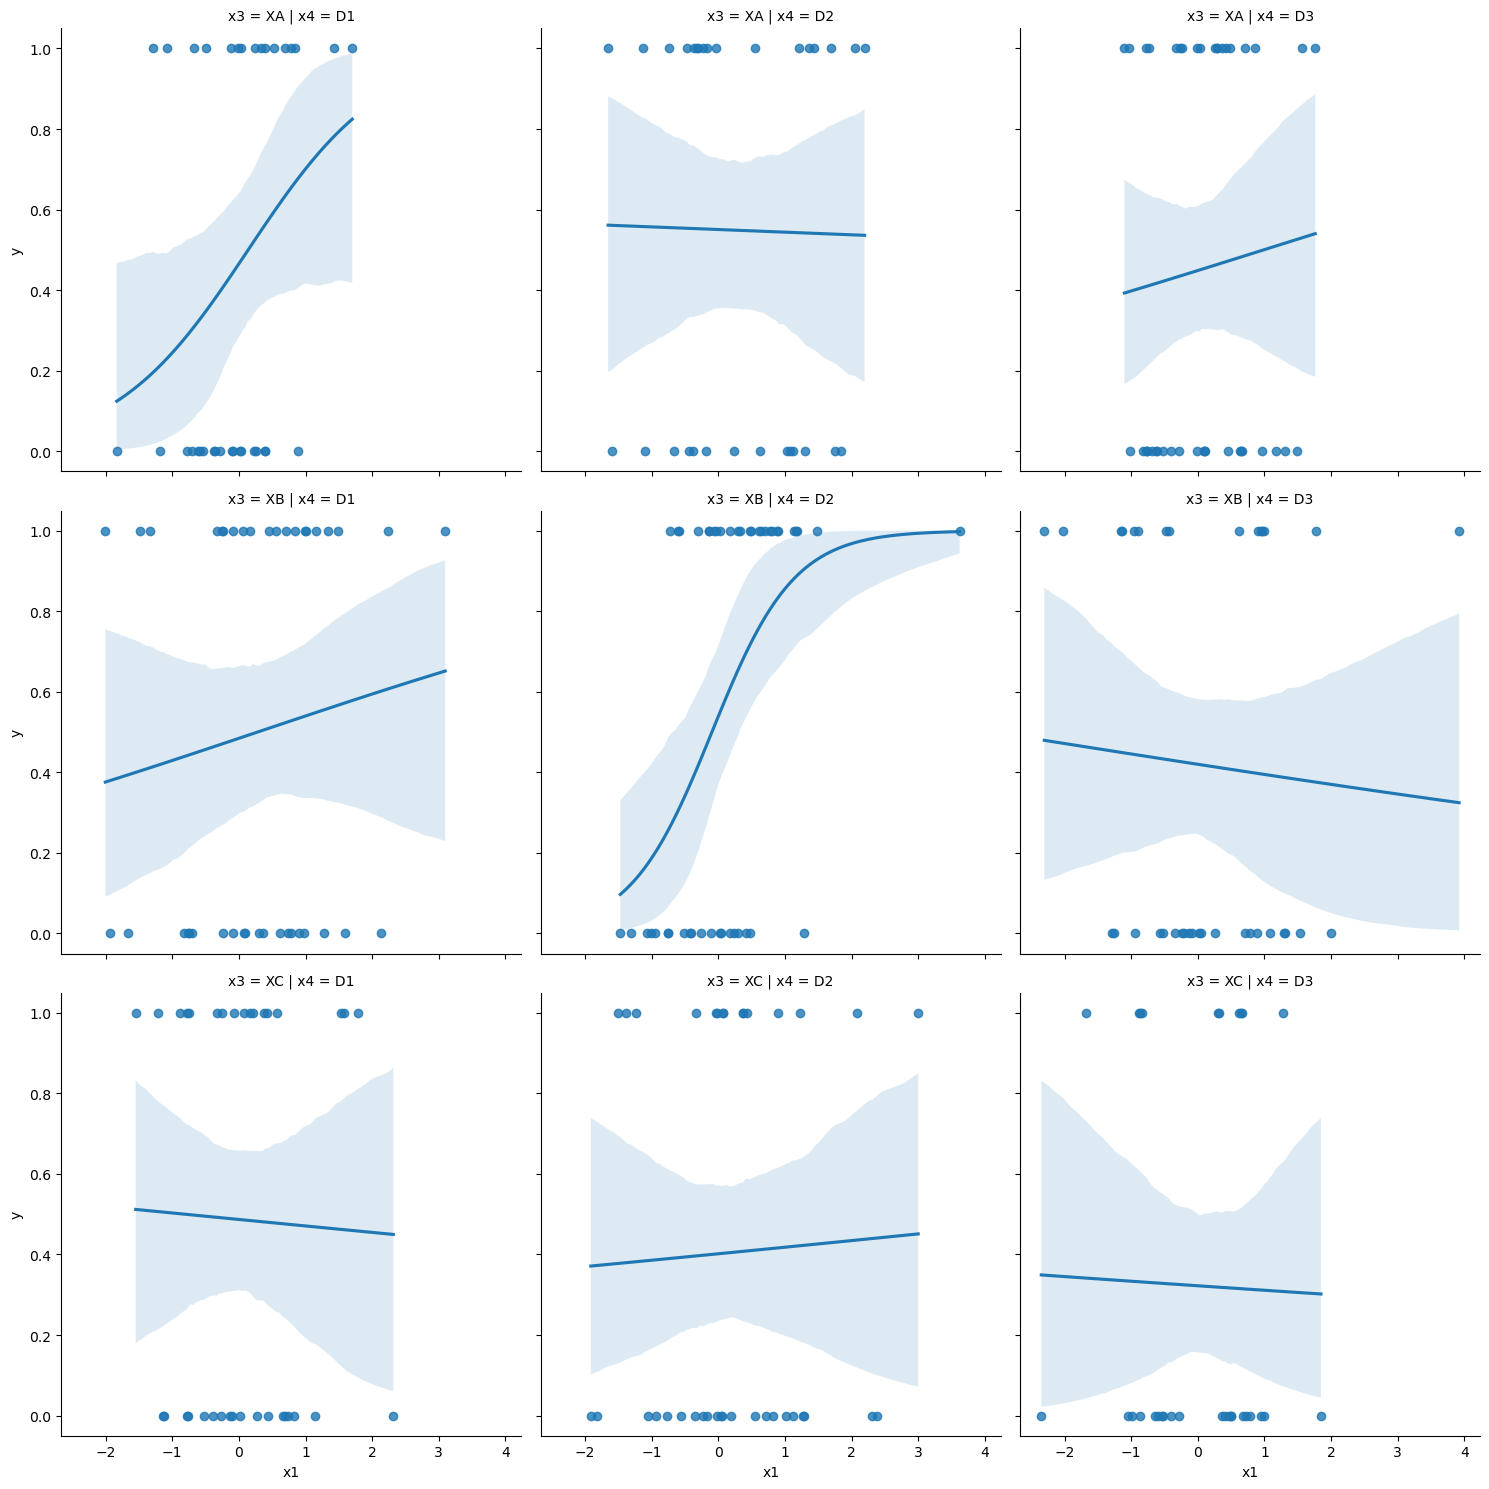

In [22]:
sns.lmplot(data= df, x = 'x1', y = 'y', col='x4', row='x3', logistic= True)

plt.show()

/Applications/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/Applications/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/Applications/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation or prediction detected, parameter may not be identified
  warnings.warn(msg, category=PerfectSeparationWarning)
/Applications/anaconda3/envs/cmpinf2100/lib/python3.8/site-packages/statsmodels/genmod/generalized_linear_model.py:1257: PerfectSeparationWarning: Perfect separation 

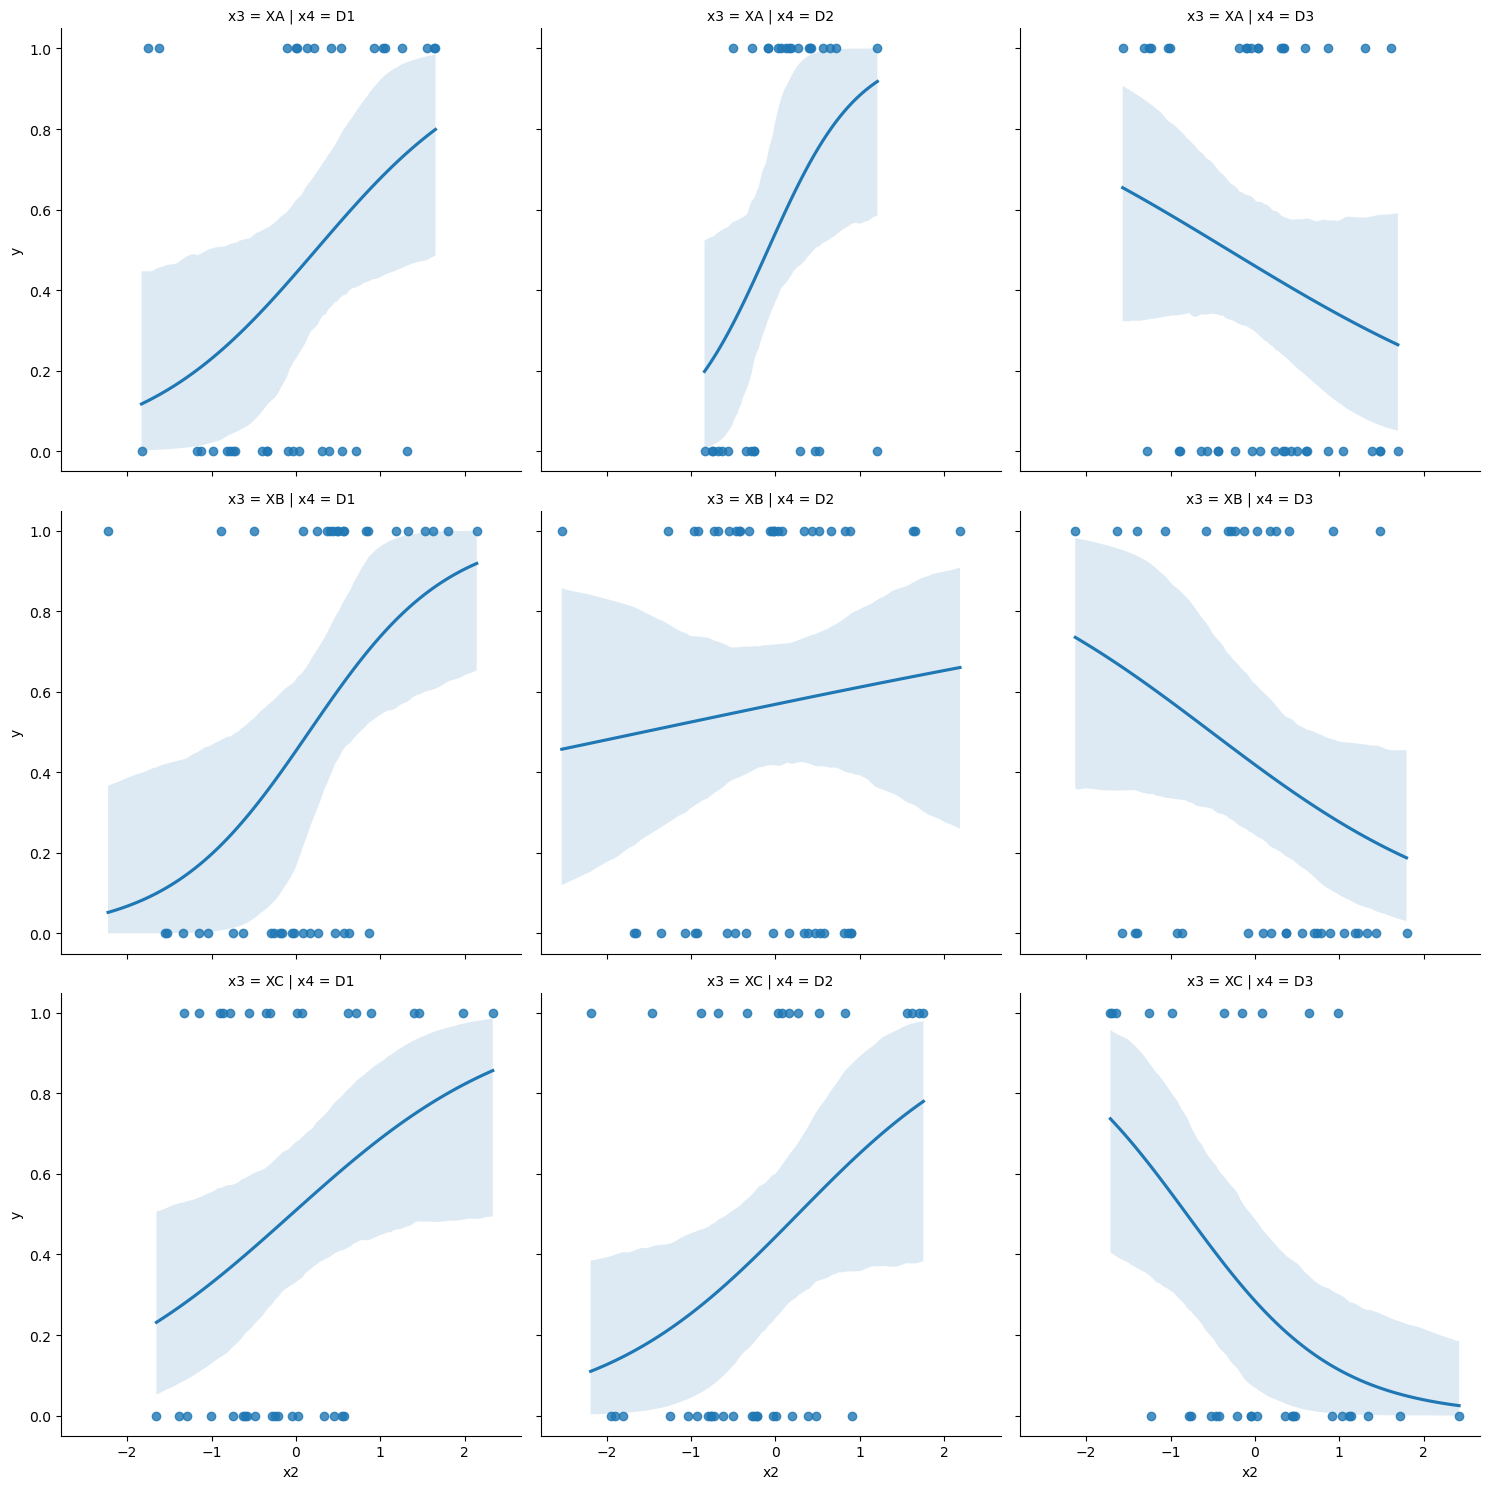

In [23]:
sns.lmplot(data= df, x = 'x2', y = 'y', col='x4', row='x3', logistic= True)

plt.show()

In [27]:
df.x1.value_counts()

-1.184739    1
-0.071816    1
 0.362269    1
 0.523879    1
 0.398233    1
            ..
 1.557094    1
-1.594329    1
-1.927309    1
-0.282423    1
-0.083797    1
Name: x1, Length: 333, dtype: int64

### 1g)

Does the RELATIONSHIP between the EVENT PROBABILITY with respect to the continuous inputs seem to CHANGE across the COMBINATIONS of the categorical inputs?

#### 1g) - SOLUTION

What do you think?

Yes, the RELATIONSHIP between the EVENT PROBABILITY with respect to the continuous inputs seem to CHANGE across the COMBINATIONS of the categorical inputs

## Problem 02

Now that you have explored the data, let's start fitting LOGISTIC REGRESSION models! You will ultimately fit multiple models for this application. However, let's begin with the "conventional" or "basic" LOGISTIC REGRESSION model. The "conventional" model uses LINEAR ADDITIVE FEATURES for **all** inputs. Thus, the "conventional" LOGISTIC REGRESSION model accounts for the linear additive main effects for the continuous inputs and accounts for the categories of the categorical inputs via DUMMY variables.

You will use this "conventional" model as the starting point to setup calculating the BINARY CLASSIFICATION performance metrics.

### 2a)

You must use the CORRECT statsmodels function to fit a LOGISTIC REGRESSION model that LINEARLY relates the continuous inputs and categorical inputs to the LOG-ODDS RATIO. This "conventional" model therefore assumes LINEAR ADDITIVE FEATURES for **all** inputs.

Assign the fitted model to the `fit_03` object. 

**HINT**: You will see why the model is named "03" later...

#### 2a) - SOLUTION

In [28]:
fit_03 = smf.logit(data = df, formula= 'y~x1+x2+x3+x4').fit()

Optimization terminated successfully.
         Current function value: 0.671463
         Iterations 4


### 2b)

Which FEATURES are considered statistically significant using the conventional thresholds. Are the SIGNS of the statistically significant features POSITIVE or NEGATIVE?

#### 2b) - SOLUTION

In [29]:
print(fit_03.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  333
Model:                          Logit   Df Residuals:                      326
Method:                           MLE   Df Model:                            6
Date:                Thu, 23 Nov 2023   Pseudo R-squ.:                 0.02794
Time:                        16:28:52   Log-Likelihood:                -223.60
converged:                       True   LL-Null:                       -230.02
Covariance Type:            nonrobust   LLR p-value:                   0.04546
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0149      0.254     -0.059      0.953      -0.512       0.483
x3[T.XB]       0.0167      0.270      0.062      0.951      -0.513       0.546
x3[T.XC]      -0.3021      0.284     -1.063      0.2

In [32]:
fit_03.pvalues

Intercept    0.953078
x3[T.XB]     0.950657
x3[T.XC]     0.287695
x4[T.D2]     0.664341
x4[T.D3]     0.224475
x1           0.048861
x2           0.029824
dtype: float64

x1 and x2 are significant.

### 2c)

Measuring the BINARY CLASSIFICATION performance on the TRAINING data requires PREDICTING the TRAINING set. However, we do not want to alter or modify the training data. We want to keep the TRAINING data as it is. Therefore, you will create a COPY of the TRAINING set and subsequentialy manipulate this COPIED version.

Create a COPY of the training set named `df_copy`. Create a NEW column named `pred_probability` within `df_copy` that is assigned the prediction on the TRAINING set using the `fit_03` model.

Display the head of the `df_copy` object to show it is structured correctly.

#### 2c) - SOLUTION

In [41]:
df_copy = df.copy()
df_copy['pred_probability'] = fit_03.predict(df_copy)
df_copy.head()

,x1,x2,x3,x4,y,pred_probability
0,-1.184739,-0.034497,XA,D1,0,0.427008
1,0.029507,1.652312,XB,D2,1,0.638351
2,-0.991727,0.451010,XC,D3,0,0.318651
3,-1.664412,-0.164246,XB,D1,0,0.396206
4,-0.363636,0.721812,XA,D2,1,0.553128


### 2d)

As discussed in lecture, LOGISTIC REGRESSION models predict the EVENT PROBABILITY and NOT the BINARY category. Classification requires an additional DECISION step. You must now make that DECISION to convert the predicted probability into a BINARY class!

Create a NEW column in `df_copy` named `pred_class`. Assign the CLASSIFICATION associated with the predicted EVENT PROBABILITY using the COMMON of DEFAULT threshold value. The CLASS labels **MUST** be the SAME unique values as the observed BINARY OUTCOME.

Display the head of the `df_copy` object to show it is structured correctly.

#### 2d) - SOLUTION

In [43]:
df_copy['pred_class'] = np.where( df_copy.pred_probability > 0.5, 1, 0 )
df_copy.head()

,x1,x2,x3,x4,y,pred_probability,pred_class
0,-1.184739,-0.034497,XA,D1,0,0.427008,0
1,0.029507,1.652312,XB,D2,1,0.638351,1
2,-0.991727,0.451010,XC,D3,0,0.318651,0
3,-1.664412,-0.164246,XB,D1,0,0.396206,0
4,-0.363636,0.721812,XA,D2,1,0.553128,1


### 2e)

You now have the TRAINING set CLASSIFICATIONS associated with the fitted LOGISTIC REGRESSION model! Let's begin measuring the performance with a simple yet important performance metric, Accuracy.

Calculate the `fit_03` model's Accuracy by directly COMPARING the observed BINARY OUTCOME to the model CLASSIFICATION.

Display the Accuracy to the screen.

#### 2e) - SOLUTION

In [44]:
np.mean( df_copy.y == df_copy.pred_class )

0.6006006006006006

### 2f)

Accuracy is important but it does not tell the whole story. Accuracy ignores HOW the model was correct AND Accuracy ignores HOW the model was wrong! The CONFUSION MATRIX shows the COUNTS for CORRECT classifications and ERRORS! You therefore are able to understand HOW the model was wrong!

Create the CONFUSION MATRIX as a Seaborn HEAT MAP. The observed BINARY OUTCOME must be on the VERTICAL axis and the model CLASSIFICATIONS must be on the HORIZONTAL axis. The HEAT MAP must include the MARGINAL counts.

#### 2f) - SOLUTION

In [45]:
pd.crosstab( df_copy.y, df_copy.pred_class )

pred_class,0,1
y,,
0,127,51
1,82,73


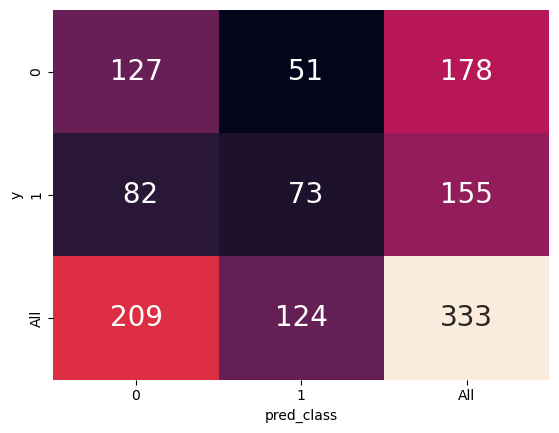

In [47]:
fig, ax = plt.subplots()

sns.heatmap( pd.crosstab(df_copy.y, df_copy.pred_class, margins=True),
             annot=True, annot_kws={'size': 20}, fmt='3d', cbar= False )

plt.show()

### 2g)

The scikit-learn function `confusion_matrix()` also creates a CONFUSION MATRIX. The function returns a NumPy 2D array. However, the 2D array can be converted to a 1D array which allows returning the CONFUSION MATRIX combinations. Thus, the `confusion_matrix()` function allows you to extract the counts associated with TRUE-NEGATIVES, FALSE-POSITIVES, FALSE-NEGATIVES, and TRUE-POSITIVES. 

Use the `confusion_matrix()` function to return the counts for the TRUE-NEGATIVES, FALSE-POSITIVES, FALSE-NEGATIVES, and TRUE-POSITIVES associated with the `fit_03` model on the TRAINING set. These counts should be assigned to objects named, `TN`, `FP`, `FN`, and `TP`, respectively.

#### 2g) - SOLUTION

In [48]:
confusion_matrix( df_copy.y.to_numpy(), df_copy.pred_class.to_numpy() )
TN, FP, FN, TP = confusion_matrix( df_copy.y.to_numpy(), 
                                  df_copy.pred_class.to_numpy() ).ravel()

### 2h)

Use the CONFUSION MATRIX combination counts to calculate the Accuracy associated with the `fit_03` model on the TRAINING set. Display the Accuracy to the screen. 

**HINT**: Did you get the SAME result as 2e)?

#### 2h) - SOLUTION

In [49]:
(TP+TN)/(TP+TN+FP+FN)

0.6006006006006006

## Problem 03

You calculated the Accuracy from the CONFUSION MATRIX in 2h), but as already mentioned the CONFUSION MATRIX lets you understand the model performance in much more detail. This problem is focused on studying the CLASSIFICATION performance from different perspectives.

### 3a)

Calculate the SENSITIVITY associated with the `fit_03` model on the TRAINING set. Display the SENSITIVITY to the screen.

#### 3a) - SOLUTION

In [50]:
TP/(TP+FN)

0.47096774193548385

### 3b) 

Calculate the SPECIFICITY associated with the `fit_03` model on the TRAINING set. Display the SPECIFICITY to the screen.

#### 3b) - SOLUTION

In [51]:
TN/(TN+FP)

0.7134831460674157

### 3c)

Calculate the FALSE POSITIVE RATE (FPR) associated with the `fit_03` model on the TRAINING set. Display the FPR to the screen.

#### 3c) - SOLUTION

In [52]:
1-TN/(TN+FP)

0.2865168539325843

### 3d)

Does the `fit_03` model do a better job CLASSIFYING the EVENT or the NON-EVENT on the TRAINING set? Which performance metrics allowed you to answer this question?

#### 3d) - SOLUTION

What do you think?

It did a better job on classifying the non-event. FPR and TPR helped me to conclude that.

### 3e)

The CONFUSION MATRIX and summary statistics derived from it required you to ASSUME a specific THRESHOLD value. The ROC curve does NOT assume a single THRESHOLD. Instead, it tries ALL possible THRESHOLD values. You are therefore able to examine the model's CLASSIFICATION performance REGARDLESS of the threshold!

The scikit-learn function `roc_curve()` generates the TRUE POSITIVE RATE (TPR) and FALSE POSITIVE RATE (FPR) for all THRESHOLD values required to create the ROC curve. You must use the `roc_curve()` function to create the TPR, FPR, and THRESHOLD values associated with the `fit_03` model on the TRAINING set. Assign the TPR, FPR, and THRESHOLD values to the `tpr_03`, `fpr_03`, and `threshold_03` objects, repectively.

#### 3e) - SOLUTION

In [54]:
fpr_03, tpr_03, threshold_03 = roc_curve( df_copy.y.to_numpy(),
                                    df_copy.pred_probability.to_numpy() )

### 3f)

You now have everything necessary to produce the ROC curve for the `fit_03` on the TRAINING set! Create the ROC curve using matplotlib. The ROC curve x and y axes must be labeled correctly. A diagonal "45-degree" reference line MUST be included in the the figure.

#### 3f) - SOLUTION

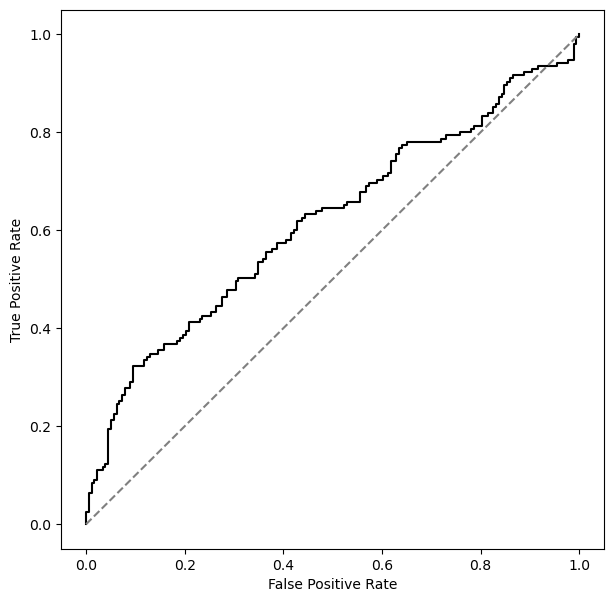

In [55]:
fig, ax = plt.subplots(figsize=(7,7))

ax.plot( fpr_values, tpr_values, color='k')
ax.plot([0, 1], [0, 1], color='grey', linestyle='--')

ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')

plt.show()

### 3g)

The ROC curve is a GRAPHICAL TOOL. However, it can be "converted" into a QUANTITATIVE metric by calculating the Area Under the Curve (AUC). The scikit-learn function `roc_auc_score()` calculates the the ROC AUC. You must use that function to calculate the ROC AUC for the `fit_03` model on the TRAINING set. Display the ROC AUC to the screen.  

#### 3g) - SOLUTION

In [56]:
roc_auc_score( df_copy.y.to_numpy(), df_copy.pred_probability.to_numpy() )

0.6169626676332004

### 3h)

Is the ROC AUC calculated in 3g) consistent with the ROC curve you visualized in 3f)? Please provide the reasoning behind your answer.

#### 3h) - SOLUTION

What do you think?

Yes, it is basically the area under the curve and the area is slightly above 0.5 the area of the triangle. In some portion the curve goes below the line y=x.

## Problem 04

You performed multiple steps in order to calculate the BINARY CLASSIFICATION performance metrics. Training additional models will therefore require REPEATING those steps many times! It would be tedious and time consuming to manually retype the code to execute those steps. It would be temping to copy and paste the code, but copy and pasting is DANGEROUS! It is very easy to forget to change things when needed leading to difficult to debug errors!

Instead, you will define a function that calculates the BINARY CLASSIFICATION performance metrics for a GIVEN model on a GIVEN data set. This lets you APPLY the function to any model you wish without having to retype the code to calculate the metrics!

### 4a)

You must define a function that calculates BINARY CLASSIFICATION performance metrics for a GIVEN model on a GIVEN data set. The function must be named `tidy_binary_metrics()`. The function must have 4 arguments. The zeroth argument is a statsmodel fitted object named `mod`. The one argument is a name, label, or id for the model named, `mod_name`. The two argument is the data set to measure the performance on named `the_data`. The last argument is the threshold used for converting the predicted probabilities to classifications named `threshold`. The `threshold` argument must have a DEFAULT value equal to 0.5.

The `tidy_binary_metrics()` function must return a Pandas DataFrame that consists of a SINGLE row. That row must have columns named `model_name`, `num_coefs`, `threshold`, `Accuracy`, `Sensitivity`, `Specificity`, `FPR`, and `ROC_AUC`. The `model_name` column must contain the `mod_name` argument provided to the function and serves as the unique ID for the model. The `num_coefs` column must contain the number of regression coefficients in the model. The `threshold` column contains the `threshold` argument provided to the function. The rest of the columns correspond to the performance metrics you must calculate within the function.

**HINT**: The `the_data` argument must NOT have a default value. But you may think of it as the TRAINING set which includes ALL inputs and the OUTPUT. The OUTPUT may be assumed to have the SAME name as the OUTPUT variable in the TRAINING set.

Check that your `tidy_binary_metrics()` function is correct by calculating the performance metrics for the `fit_03` model on the TRAINING set `df`. Set the `mod_name` argument to 3. If you programmed the `tidy_binary_metrics()` function correctly, you should get the SAME metrics that you calculated "manually" in Problem 03. The difference is that `tidy_binary_metrics()` returns a DataFrame. The columns of that DataFrame contain the metrics.

**HINT**: The last recording for Module 12 shows a function SIMILAR to this one. However, `tidy_binary_metrics()` must **NOT** fit the model. Instead, it accepts a statsmodel fitted object as an argument to the function.

#### 4a) - SOLUTION

In [65]:
def tidy_binary_metrics(mod, mod_name, the_data, threshold):    
    data_copy = the_data.copy()
    
    data_copy['pred_probability'] = mod.predict( the_data )
    
    data_copy['pred_class'] = np.where( data_copy.pred_probability > threshold, 1, 0 )
    
    TN, FP, FN, TP = confusion_matrix( data_copy.y.to_numpy(), data_copy.pred_class.to_numpy() ).ravel()
    
    Accuracy = (TN + TP) / (TN + FP + FN + TP)
    
    Sensitivity = (TP) / (TP + FN)
    
    Specificity = (TN) / (TN + FP)
    
    FPR = 1 - Specificity
    
    ROC_AUC = roc_auc_score( data_copy.y.to_numpy(), data_copy.pred_probability.to_numpy() )
    
    res_dict = {'model_name': mod_name,
                'num_coefs': len( mod.params ),
                'threshold': threshold,
                'Accuracy': Accuracy,
                'Sensitivity': Sensitivity,
                'Specificity': Specificity,
                'FPR': FPR,
                'ROC_AUC': ROC_AUC}
    
    return pd.DataFrame( res_dict, index=[0] )

### Problem 4b)

The `fit_03` model uses LINEAR ADDITIVE FEATURES associated with ALL inputs. But, to truly understand if this model is "good", we need to compare it to OTHER models! You will now fit a VERY simple model; the SIMPLEST possible model! You will fit a model that predicts a CONSTANT event probability! This model does NOT have any relationships between the LOG ODDS RATIO and the inputs! This model assumes the EVENT PROBABILITY does NOT change!

Assign the fitted model to the `fit_00` object.

Display the estimated coefficient associated with `fit_00` to the screen.

#### 4b) - SOLUTION

In [62]:
fit_00 = smf.logit(data = df, formula = 'y~1').fit()

Optimization terminated successfully.
         Current function value: 0.690760
         Iterations 3


In [63]:
fit_00.params

Intercept   -0.138358
dtype: float64

### 4c)

Use the `tidy_binary_metrics()` function to calculate the BINARY CLASSIFICATION performance metrics for the `fit_00` model on the TRAINING set. Set the `mod_name` argument to 0. Display the returned DataFrame to the screen.

What is the Accuracy of the `fit_00` model? Where have you seen this particular value before in this assignment? 

#### 4c) - SOLUTION

In [66]:
tidy_binary_metrics(fit_00, 0, df, 0.5)

,model_name,num_coefs,threshold,Accuracy,Sensitivity,Specificity,FPR,ROC_AUC
0,0,1,0.5,0.534535,0.0,1.0,0.0,0.5


The accuracy is 0.534535. We have seen this in 1c) for proportion of 0. 

### 4d) 

The CONSTANT model is the simplest possible model. Let's add complexity compared to `fit_00` while still being simpler than `fit_03`. Let's fit a model that ONLY uses the CATEGORICAL INPUTS. This model should ADD the effects of the CATEGORICAL INPUTS.

Assign the fitted model to the `fit_01` object.

Which FEATURES are statistically significant? Are the SIGNS of the statistically significant features POSITIVE or NEGATIVE?

#### 4d) - SOLUTION

In [69]:
fit_01 = smf.logit(data = df, formula = 'y~x3+x4').fit()

Optimization terminated successfully.
         Current function value: 0.683430
         Iterations 4


In [70]:
fit_01.pvalues

Intercept    0.930401
x3[T.XB]     0.899059
x3[T.XC]     0.227220
x4[T.D2]     0.683752
x4[T.D3]     0.229582
dtype: float64

None are significant.

### 4e)

Use the `tidy_binary_metrics()` function to calculate the BINARY CLASSIFICATION performance metrics for the `fit_01` model on the TRAINING set. Set the `mod_name` argument to 1. Display the returned DataFrame to the screen.

#### 4e) - SOLUTION

In [71]:
tidy_binary_metrics(fit_01, 1, df, 0.5)

,model_name,num_coefs,threshold,Accuracy,Sensitivity,Specificity,FPR,ROC_AUC
0,1,5,0.5,0.552553,0.509677,0.589888,0.410112,0.562486


### 4f)

Let's now try a model that ONLY uses the continuous inputs. Fit a LOGISTIC REGRESSION model that LINEARLY relates the CONTINUOUS INPUTS to the LOG ODDS RATIO. This model must NOT use the CATEGORICAL INPUTS. 

Assign the fitted model to the `fit_02` object. 

Which FEATURES are statistically significant? Are the SIGNS of the statistically significant features POSITIVE or NEGATIVE?

#### 4f) - SOLUTION

In [72]:
fit_02 = smf.logit(data = df, formula = 'y~x1+x2').fit()

Optimization terminated successfully.
         Current function value: 0.678115
         Iterations 4


In [73]:
fit_02.pvalues

Intercept    0.127488
x1           0.037078
x2           0.029234
dtype: float64

x1 and x2 are significant.

In [74]:
fit_02.params

Intercept   -0.171490
x1           0.239128
x2           0.265035
dtype: float64

both coeff of x1 and x2 are positive.

### 4g)

Use the `tidy_binary_metrics()` function to calculate the BINARY CLASSIFICATION performance metrics for the `fit_02` model on the TRAINING set. Set the `mod_name` argument to 2. Display the returned DataFrame to the screen.

#### 4g) - SOLUTION

In [75]:
tidy_binary_metrics(fit_02, 2, df, 0.5)

,model_name,num_coefs,threshold,Accuracy,Sensitivity,Specificity,FPR,ROC_AUC
0,2,3,0.5,0.567568,0.406452,0.707865,0.292135,0.592425


### 4h)

You have fit a total of 4 models so far, `fit_00` through `fit_03`. Which of those 4 models is the BEST according to the TRAINING set Accuracy? Which of the 4 models is the BEST according to the TRAINING set ROC AUC?

#### 4h) - SOLUTION

What do you think?

In all cases fit_03 is the best.

### Problem 05

Do you see the naming pattern for the fitted model objects? `fit_00` did NOT use any inputs. `fit_01` only used CATEGORICAL INPUTS. `fit_02` only used CONTINUOUS INPUTS. The first model you fit in this assignment, `fit_03`, used LINEAR ADDITIVE FEATURES for ALL inputs. Although `fit_03` was the initial model, I generally recommend starting with the SIMPLEST possible model and then adding complexity. That is why `fit_03` was named as the third model even though it was the initial model you worked with in this assignment.

This means the next model you will fit must continue to increase the complexity! The next model must use MORE FEATURES than the model with ALL inputs! You have only worked with ADDITIVE features so far, so let's increase complexity by including INTERACTIONS.

### 5a)

Fit a LOGISTIC REGRESSION model which interacts each CATEGORICAL INPUT with each CONTINUOUS input. The model must therefore include the **main effects** for the CATEGORICAL INPUTS and the **main effects** for the CONTINUOUS INPUTS **and** the interactions between each the categoricals with the continuous inputs. The categorical inputs should NOT be interacted and the continuous inputs should NOT be interacted.

Assign the the fitted model to `fit_04`.

Which FEATURES are statistically significant? Are the SIGNS of the statistically significant features POSITIVE or NEGATIVE?

#### 5a) - SOLUTION

In [76]:
fit_04 = smf.logit(data = df, formula = 'y~x1+x2+x3+x4+(x1+x2)*(x3+x4)').fit()

Optimization terminated successfully.
         Current function value: 0.616633
         Iterations 5


In [ ]:
fit_04.pvalues < 0.05

Intercept      False
x3[T.XB]       False
x3[T.XC]       False
x4[T.D2]       False
x4[T.D3]       False
x1             False
x1:x3[T.XB]    False
x1:x3[T.XC]    False
x1:x4[T.D2]    False
x1:x4[T.D3]    False
x2              True
x2:x3[T.XB]    False
x2:x3[T.XC]    False
x2:x4[T.D2]    False
x2:x4[T.D3]     True
dtype: bool

In [81]:
fit_04.params

Intercept     -0.051960
x3[T.XB]      -0.021147
x3[T.XC]      -0.279678
x4[T.D2]       0.167775
x4[T.D3]      -0.254949
x1             0.262782
x1:x3[T.XB]    0.266487
x1:x3[T.XC]   -0.041849
x1:x4[T.D2]    0.056859
x1:x4[T.D3]   -0.509131
x2             1.182202
x2:x3[T.XB]   -0.271334
x2:x3[T.XC]   -0.279308
x2:x4[T.D2]   -0.271057
x2:x4[T.D3]   -1.713623
dtype: float64

both coeff of x2 (positive value) and x2 interaction with x4 on D3 (negative value) are significant.

### 5b)

Use the `tidy_binary_metrics()` function to calculate the BINARY CLASSIFICATION performance metrics for the `fit_04` model on the TRAINING set. Set the mod_name argument to 4. Display the returned DataFrame to the screen.

#### 5b) - SOLUTION

In [83]:
tidy_binary_metrics(fit_04, 4, df, 0.5)

,model_name,num_coefs,threshold,Accuracy,Sensitivity,Specificity,FPR,ROC_AUC
0,4,15,0.5,0.651652,0.567742,0.724719,0.275281,0.71457


### 5c)

Let's continue to increase the complexity by including more INTERACTIONS! The next model must include the CONTINUOUS INPUT **main effects** and the INTERACTIONS between the CONTINUOUS INPUTS. ALL continuous FEATURES must INTERACT with EACH CATEGORICAL INPUT. The model must therefore include the **main effects** for the CATEGORICAL INPUTS, the **main effects** for the CONTINUOUS INPUTS, the interactions between the CONTINUOUS INPUTS, and the interactions between each categorical with all continuous features. The categorical inputs should NOT be interacted.

Assign the fitted model to `fit_05`.

Which FEATURES are statistically significant? Are the SIGNS of the statistically significant features POSITIVE or NEGATIVE?

#### 5c) - SOLUTION

In [92]:
fit_05 = smf.logit(data = df, formula = 'y~x3+x4+(x1+x2)**2+\
                   (x1+x2)*(x3+x4)').fit()

Optimization terminated successfully.
         Current function value: 0.607801
         Iterations 6


In [93]:
fit_05.pvalues < 0.05

Intercept      False
x3[T.XB]       False
x3[T.XC]       False
x4[T.D2]       False
x4[T.D3]       False
x1             False
x1:x3[T.XB]    False
x1:x3[T.XC]    False
x1:x4[T.D2]    False
x1:x4[T.D3]    False
x2              True
x2:x3[T.XB]    False
x2:x3[T.XC]    False
x2:x4[T.D2]    False
x2:x4[T.D3]     True
x1:x2           True
dtype: bool

In [94]:
fit_05.params

Intercept     -0.050666
x3[T.XB]      -0.102151
x3[T.XC]      -0.340597
x4[T.D2]       0.207550
x4[T.D3]      -0.265326
x1             0.204537
x1:x3[T.XB]    0.262653
x1:x3[T.XC]   -0.138782
x1:x4[T.D2]    0.077346
x1:x4[T.D3]   -0.493570
x2             1.308721
x2:x3[T.XB]   -0.187362
x2:x3[T.XC]   -0.274512
x2:x4[T.D2]   -0.327328
x2:x4[T.D3]   -1.859228
x1:x2         -0.353869
dtype: float64

both coeff of x2 (positive value) and x2 interaction with x4 on D3 (negative value) and x1 interaction with x2 are significant.

### 5d)

Use the `tidy_binary_metrics()` function to calculate the BINARY CLASSIFICATION performance metrics for the `fit_05` model on the TRAINING set. Set the mod_name argument to 5. Display the returned DataFrame to the screen.

#### 5d) - SOLUTION

In [95]:
tidy_binary_metrics(fit_05, 5, df, 0.5)

,model_name,num_coefs,threshold,Accuracy,Sensitivity,Specificity,FPR,ROC_AUC
0,5,16,0.5,0.651652,0.587097,0.707865,0.292135,0.725843


### 5e)

Let's fit one more model for this assignment. This last model will be the most complex yet! The next model must include QUADRATIC FEATURES (second degree polynomials) derived from each continuous input. The QUADRATIC FEATURES must be included with the CONTINUOUS INPUT **main effects** and the INTERACTIONS between the CONTINUOUS INPUTS. You MUST continue to INTERACT ALL continuous FEATURES with EACH CATEGORICAL INPUT. Therefore, this model allows the relationship between the LOG ODDS RATIO and ALL continuous FEATURES to vary across the categorical input categories!

Assign the fitted model to `fit_06`.

Which FEATURES are statistically significant? Are the SIGNS of the statistically significant features POSITIVE or NEGATIVE?

#### 5e) - SOLUTION

In [96]:
fit_06 = smf.logit(data = df, formula = 'y~np.power(x1,2)+ x3+x4+(x1+x2)**2+\
                   (x1+x2)*(x3+x4)+ np.power(x2,2)').fit()

Optimization terminated successfully.
         Current function value: 0.600283
         Iterations 6


In [97]:
fit_06.pvalues < 0.05

Intercept          False
x3[T.XB]           False
x3[T.XC]           False
x4[T.D2]           False
x4[T.D3]           False
np.power(x1, 2)    False
x1                 False
x1:x3[T.XB]        False
x1:x3[T.XC]        False
x1:x4[T.D2]        False
x1:x4[T.D3]        False
x2                  True
x2:x3[T.XB]        False
x2:x3[T.XC]        False
x2:x4[T.D2]        False
x2:x4[T.D3]         True
x1:x2              False
np.power(x2, 2)    False
dtype: bool

In [98]:
fit_06.params

Intercept         -0.234939
x3[T.XB]          -0.161082
x3[T.XC]          -0.414357
x4[T.D2]           0.190797
x4[T.D3]          -0.337837
np.power(x1, 2)    0.110576
x1                 0.133903
x1:x3[T.XB]        0.209342
x1:x3[T.XC]       -0.131050
x1:x4[T.D2]        0.084236
x1:x4[T.D3]       -0.431824
x2                 1.276090
x2:x3[T.XB]       -0.154166
x2:x3[T.XC]       -0.252769
x2:x4[T.D2]       -0.256355
x2:x4[T.D3]       -1.821446
x1:x2             -0.251694
np.power(x2, 2)    0.251985
dtype: float64

both coeff of x2 (positive value) and x2 interaction with x4 on D3 (negative value) are significant.

### 5f)

Use the `tidy_binary_metrics()` function to calculate the BINARY CLASSIFICATION performance metrics for the `fit_06` model on the TRAINING set. Set the mod_name argument to 6. Display the returned DataFrame to the screen.

#### 5f) - SOLUTION

In [100]:
tidy_binary_metrics(fit_06, 6, df, 0.5)

,model_name,num_coefs,threshold,Accuracy,Sensitivity,Specificity,FPR,ROC_AUC
0,6,18,0.5,0.666667,0.56129,0.758427,0.241573,0.729069


### 5g)

You have fit 7 models to predict the EVENT PROBABILITY (via the LOG ODDS RATIO). You CLASSIFIED the TRAINING set predictions to MEASURE the performance for all 7 models. You should have noticed that the models began SIMPLE with `fit_00` and steadily increased COMPLEXITY. The COMPLEXITY was first increased by including more LINEAR ADDITIVE FEATURES by adding MORE INPUTS. Once ALL inputs where used, complexity was increased further by including INTERACTIONS. This is the general modeling pattern I recommend for many applications. The most complex models combine INTERACTIONS with NON-LINEAR features derived from the continuous inputs.

That said, which of the 7 models is the BEST according to the TRAINING set Accuracy? Which of the 7 models is the BEST according to the TRAINING set ROC AUC?

#### 5g) - SOLUTION

In [101]:
tidy_binary_metrics(fit_00, 0, df, 0.5)

,model_name,num_coefs,threshold,Accuracy,Sensitivity,Specificity,FPR,ROC_AUC
0,6,1,0.5,0.534535,0.0,1.0,0.0,0.5


In [102]:
tidy_binary_metrics(fit_01, 1, df, 0.5)

,model_name,num_coefs,threshold,Accuracy,Sensitivity,Specificity,FPR,ROC_AUC
0,6,5,0.5,0.552553,0.509677,0.589888,0.410112,0.562486


In [103]:
tidy_binary_metrics(fit_02, 2, df, 0.5)

,model_name,num_coefs,threshold,Accuracy,Sensitivity,Specificity,FPR,ROC_AUC
0,6,3,0.5,0.567568,0.406452,0.707865,0.292135,0.592425


In [104]:
tidy_binary_metrics(fit_03, 3, df, 0.5)

,model_name,num_coefs,threshold,Accuracy,Sensitivity,Specificity,FPR,ROC_AUC
0,3,7,0.5,0.600601,0.470968,0.713483,0.286517,0.616963


In [105]:
tidy_binary_metrics(fit_04, 4, df, 0.5)

,model_name,num_coefs,threshold,Accuracy,Sensitivity,Specificity,FPR,ROC_AUC
0,4,15,0.5,0.651652,0.567742,0.724719,0.275281,0.71457


In [106]:
tidy_binary_metrics(fit_05, 5, df, 0.5)

,model_name,num_coefs,threshold,Accuracy,Sensitivity,Specificity,FPR,ROC_AUC
0,5,16,0.5,0.651652,0.587097,0.707865,0.292135,0.725843


In [ ]:
tidy_binary_metrics(fit_06, 6, df, 0.5)

,model_name,num_coefs,threshold,Accuracy,Sensitivity,Specificity,FPR,ROC_AUC
0,6,18,0.5,0.666667,0.56129,0.758427,0.241573,0.729069


Model 6 is the best in accuracy and ROC_AUC.

### 5h)

A model's COMPLEXITY corresponds to the number of FEATURES included in the model. The more FEATURES the more REGRESSION COEFFICIENTS that must be estimated. The `tidy_binary_metrics()` function returned the number of coefficients estimated for each model. What pattern do you see between the IMPROVEMENT in TRAINING set performance AND the number of REGRESSION COEFFICIENTS?

#### 5h) - SOLUTION

IMPROVEMENT in TRAINING set performance is increasing with the number of REGRESSION COEFFICIENTS.

## Problem 06

Let's conclude conclude this assignment by visualizing PREDICTIONS for the EVENT PROBABILITY with respect to the INPUTS to help interpret model behavior. Regardless of your selection as the BEST model in 5g), you will make predictions with `fit_04` and `fit_06` for this problem.

### 6a)

This problem involves multiple inputs. You will create a NEW data set to support the prediction visualizations just as you did in the previous assignment. This NEW data set will act as a GRID for the INPUT combinations, just as in the previous assignment. You MUST use ALL categories for the CATEGORICAL INPUTS to create this NEW GRID. However, you must decide which of the CONTINUOUS INPUTS to treat as the "primary" input that will ultimately be visualized on the x-axis in the prediction visualizations. This "primary" input will have the MOST unique values in the NEW GRID. The remaining input will have FEWER unique values compared to the "primary" input.

You will base your selection on the FEATURES in `fit_04`. SORT the absolute values of the STATISTICALLY SIGNIFICANT COEFFICIENTS in DESCENDING ORDER for `fit_04`. Which COEFFICIENTS have the highest MAGNITUDE estimates? Which input do you think should be the "primary" input with the MOST unique values?

#### 6a) - SOLUTION

In [116]:
fit_04.params.loc['pvalues'<0.5,:].sort_values(ascending= False)

TypeError: '<' not supported between instances of 'str' and 'float'

In [118]:
# Assuming fit_04 is your logistic regression model
fit_04_summary = fit_04.summary()

# Extracting the coefficient table
coef_table = fit_04_summary.tables[1]

# Converting the coefficient table to a DataFrame
coef_df = pd.DataFrame(coef_table.data[1:], columns=coef_table.data[0])

# Converting coefficient values to numeric and sorting by absolute values in descending order
coef_df['|coef|'] = coef_df['coef'].astype(float).abs()
sorted_coef = coef_df.sort_values('|coef|', ascending=False)

# Displaying the sorted coefficients
print(sorted_coef)

                       coef    std err          z   P>|z|     [0.025  \
14  x2:x4[T.D3]     -1.7136      0.351     -4.886   0.000     -2.401   
10           x2      1.1822      0.353      3.351   0.001      0.491   
9   x1:x4[T.D3]     -0.5091      0.316     -1.609   0.108     -1.129   
2      x3[T.XC]     -0.2797      0.303     -0.924   0.356     -0.873   
12  x2:x3[T.XC]     -0.2793      0.382     -0.731   0.465     -1.029   
11  x2:x3[T.XB]     -0.2713      0.368     -0.737   0.461     -0.992   
13  x2:x4[T.D2]     -0.2711      0.359     -0.755   0.450     -0.974   
6   x1:x3[T.XB]      0.2665      0.319      0.835   0.404     -0.359   
5            x1      0.2628      0.329      0.799   0.424     -0.382   
4      x4[T.D3]     -0.2549      0.299     -0.854   0.393     -0.840   
3      x4[T.D2]      0.1678      0.296      0.568   0.570     -0.412   
8   x1:x4[T.D2]      0.0569      0.318      0.179   0.858     -0.567   
0     Intercept     -0.0520      0.277     -0.187   0.851     -0

Interaction of x2 with x4 has the highest magnitude of estimates where x2 is the second one. I will choose x2 with the highest no of unique values.

### 6b)

You must now create the NEW input GRID to support the visualizations. The NEW input GRID must be assigned to the `dfviz` DataFrame and the column names MUST be the same as those in the TRAINING set `df`. The "primary" continuous input must consist of 101 evenly spaced values between the TRAINING set MINIMUM and TRAINING set MAXIMUM. The "secondary" or remaining continuous input must consist of 5 evenly spaced values between the TRAINING set MINIMUM and TRAINING set MAXIMUM. Each CATEGORICAL input must consist of ALL unique values in the TRAINING set. Therefore, all 4 inputs in this NEW GRID have multiple unique values! None of the INPUTS have constant values. You can use this approach here because there are ONLY 4 inputs!

Display the `.nunique()` method associated with `dfviz` to the screen to confirm it was created correctly.

#### 6b) - SOLUTION

In [125]:
dfviz = pd.DataFrame([ (x1, x2, x3, x4) for x1 in np.linspace(df.x1.min(),
                                                    df.x1.max(), num=5)
                                             for x2 in np.linspace(df.x2.min(), 
                                                    df.x2.max(), num=101)
                                             for x3 in df.x3.unique()
                                             for x4 in df.x4.unique()],
                          columns=['x1', 'x2', 'x3', 'x4'])

In [126]:
dfviz.nunique()

x1      5
x2    101
x3      3
x4      3
dtype: int64

### 6c)

You will make predictions for the EVENT PROBABILITY on the NEW `dfviz` data using the `fit_04` model. The prediction can be included as a NEW column in the DataFrame. However, just as in the previous assignment you will first make a COPY of the NEW input GRID before ADDING the NEW column!

Create a COPY of the `dfviz` DataFrame named `dfviz_copy`. Create a NEW column named `pred_probability_04` within `dfviz_copy` that is assigned the predicted EVENT PROBABILITY on the NEW `dfviz` data using the `fit_04` model.

Display the head of `dfviz_copy` object to the screen to confirm it is created correctly.

#### 6c) - SOLUTION

In [127]:
dfviz_copy = dfviz.copy()

dfviz_copy['pred_probability_04'] = fit_04.predict(dfviz)

In [128]:
dfviz_copy.head()

,x1,x2,x3,x4,pred_probability_04
0,-2.349875,-2.532545,XA,D1,0.025003
1,-2.349875,-2.532545,XA,D2,0.050077
2,-2.349875,-2.532545,XA,D3,0.834496
3,-2.349875,-2.532545,XB,D1,0.025992
4,-2.349875,-2.532545,XB,D2,0.052005


### 6d)

You now have everything necessary to visualize the predictions of the `fit_04` model on the NEW data, `dfviz`! You must visualize the predictions using a LINE CHART created in Seaborn. You must visualize the EVENT PROBABILITY with respect to the "primary" continuous input colored by the "secondary" continuous input and facetted by the combinations of the categorical inputs. The `x3` input must be associated with the horizontal (column) facets and the `x4` input must be associated with the vertical (row) facets. You must use a diverging color palette. You must set the appropriate arguments to ensure ALL lines are shown. 

#### 6d) - SOLUTION

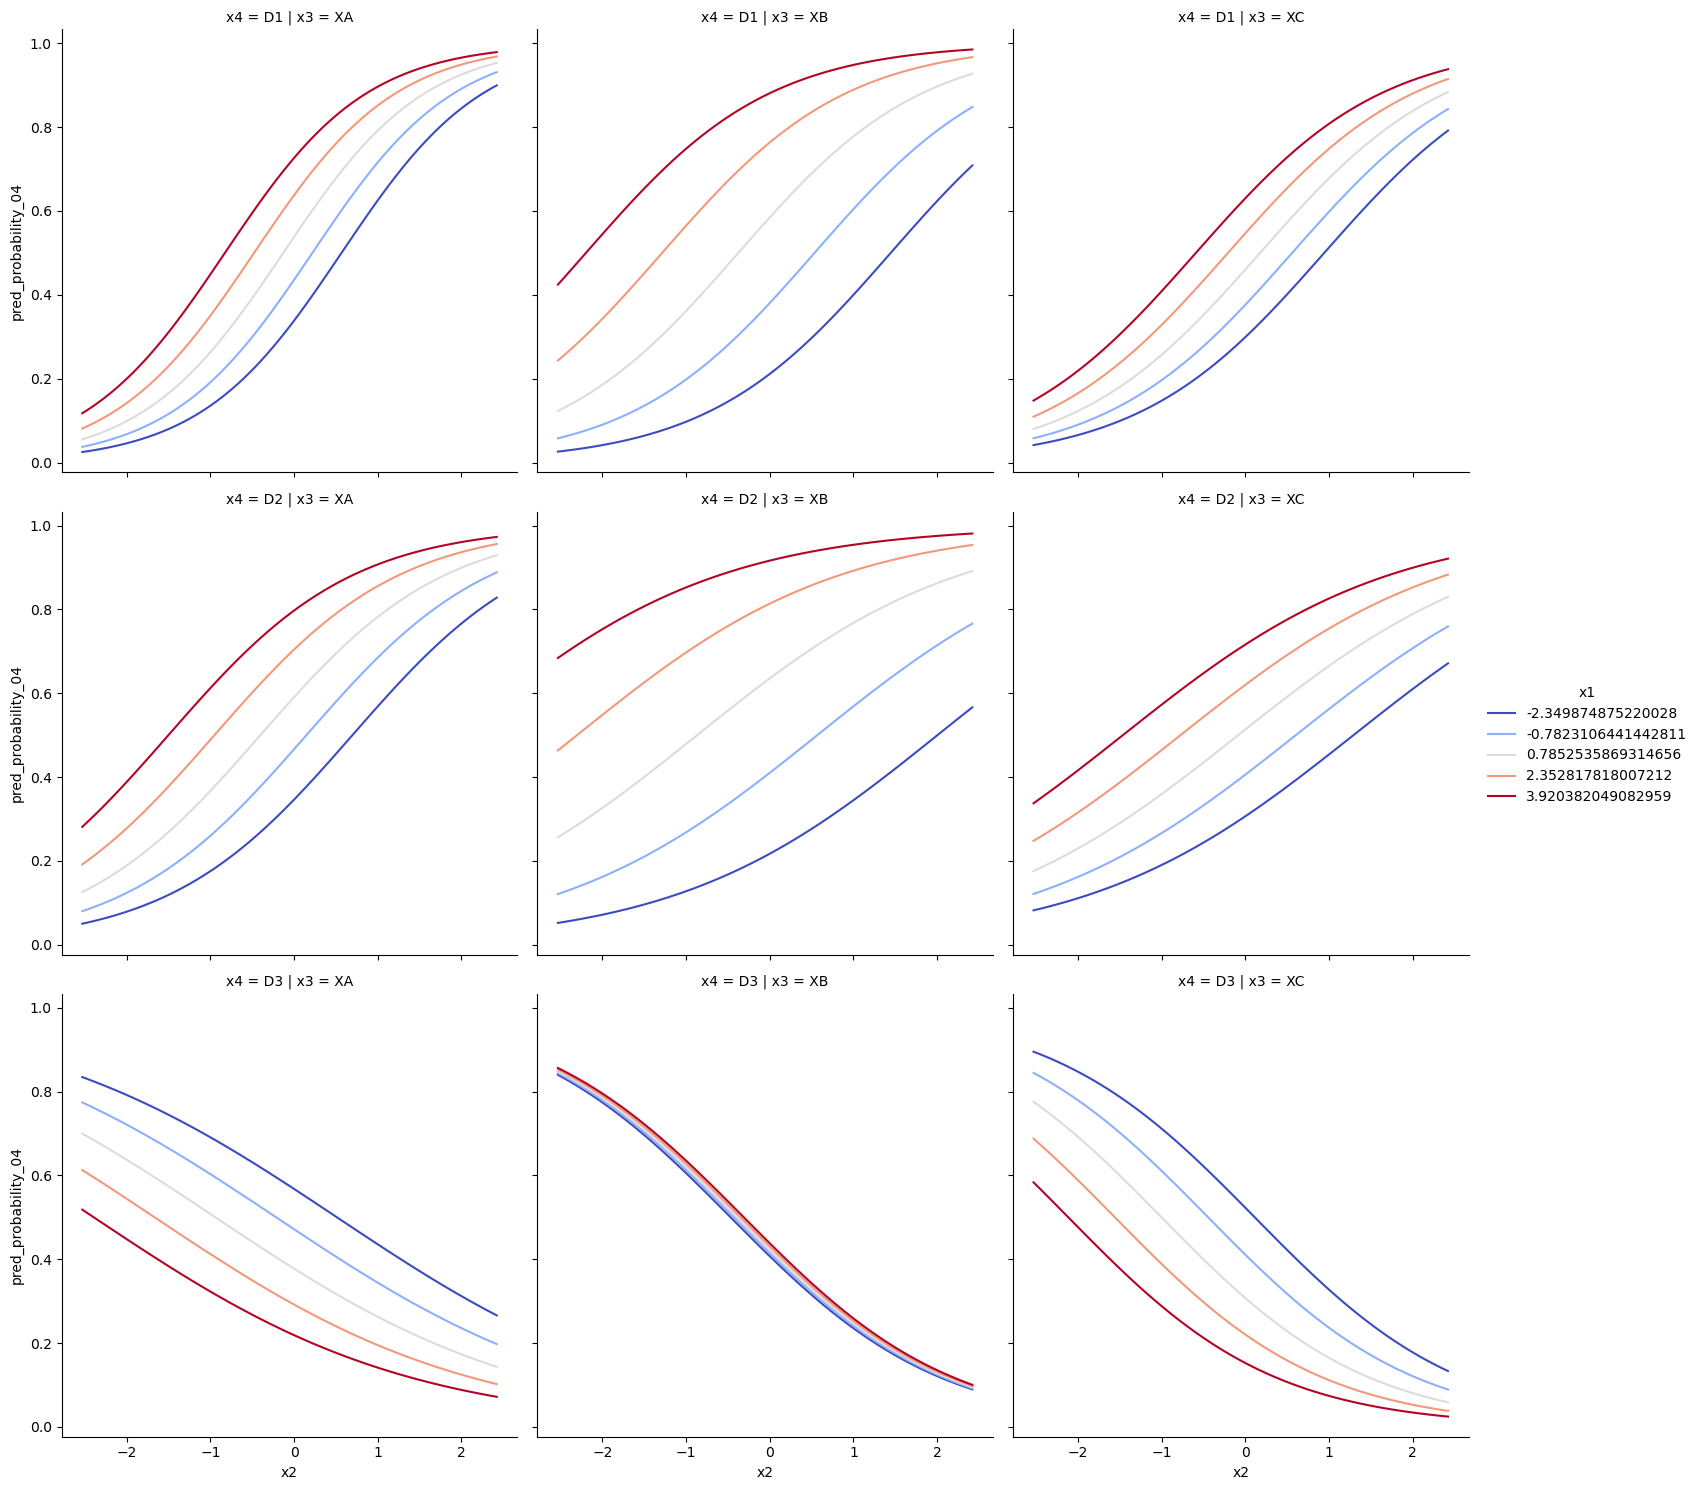

In [137]:
sns.relplot(data = dfviz_copy, x='x2', y='pred_probability_04', hue='x1', col='x3',
            row = 'x4', kind='line', estimator=None, units='x1',
            palette='coolwarm')

plt.show()

### 6e)

Let's now consider the predictions from the `fit_06` model. 

Create a NEW column named `pred_probability_06` within `dfviz_copy` that is assigned the predicted EVENT PROBABILITY on the NEW `dfviz` data using the `fit_06` model.

Display the head of `dfviz_copy` object to the screen to confirm it is created correctly.

#### 6e) - SOLUTION

Interaction of x2 with x4 has the highest magnitude of estimates where x2 is the second one. I will choose x2 with the highest no of unique values.

In [135]:
dfviz_copy['pred_probability_06'] = fit_06.predict(dfviz)

In [136]:
dfviz_copy.head()

,x1,x2,x3,x4,pred_probability_04,pred_probability_06
0,-2.349875,-2.532545,XA,D1,0.025003,0.045112
1,-2.349875,-2.532545,XA,D2,0.050077,0.082385
2,-2.349875,-2.532545,XA,D3,0.834496,0.903552
3,-2.349875,-2.532545,XB,D1,0.025992,0.035059
4,-2.349875,-2.532545,XB,D2,0.052005,0.064589


### 6f)

You now have everything necessary to visualize the predictions of the `fit_06` model on the NEW data, `dfviz`! You must visualize the predictions using a LINE CHART created in Seaborn. You must visualize the EVENT PROBABILITY with respect to the "primary" continuous input colored by the "secondary" continuous input and facetted by the combinations of the categorical inputs. The `x3` input must be associated with the horizontal (column) facets and the `x4` input must be associated with the vertical (row) facets. You must use a diverging color palette. You must set the appropriate arguments to ensure ALL lines are shown. 

#### 6f) - SOLUTION

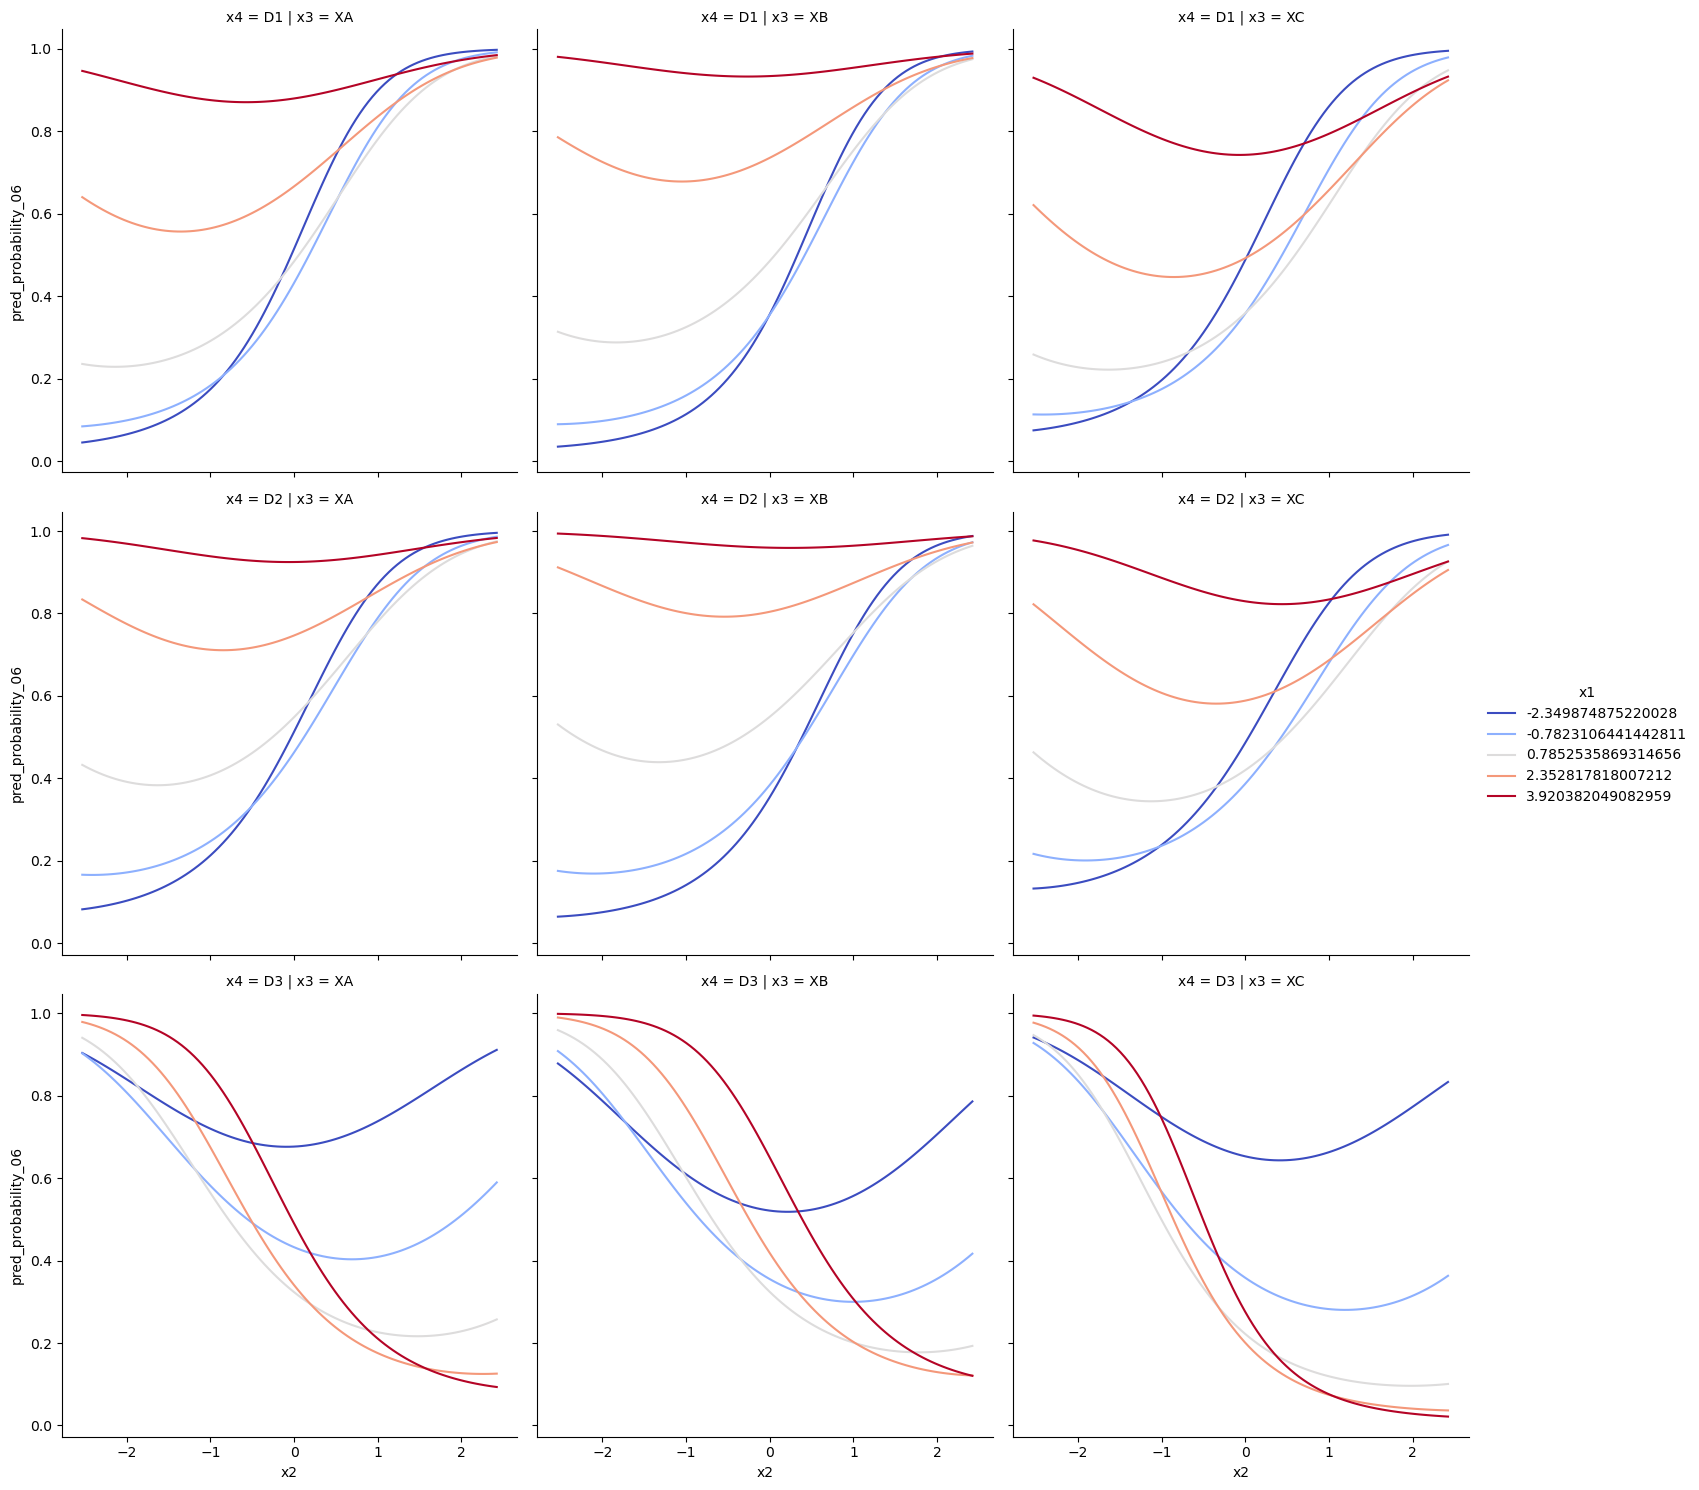

In [138]:
sns.relplot(data = dfviz_copy, x='x2', y='pred_probability_06', hue='x1', col='x3',
            row = 'x4', kind='line', estimator=None, units='x1',
            palette='coolwarm')

plt.show()

### 6g)

Based on your predictive visualizations, how would you describe the RELATIONSHIP between the EVENT PROBABILITY and the "primary" input? Does that relationship depend on other inputs? Does that relationship behavior differently between the two models, `fit_04` and `fit_06`? 

Are the visualized relationships consistent with the statistically significant FEATURES you identified previously for those two models?

#### 6g) - SOLUTION

What do you think?

When x4=D1 and D2 the event probability is increasing w.r.t x2 and x4=D3 the event probability is decreasing when separated by categories of x3. The lines are well separated except in fit_04 x4=D3|x3=XB.

They behave differently in fit_04 and fit_06. In fit_04 the lines won't overlap but in fit_04 they will.

Yes, the visualized relationships are consistent with the statistically significant FEATURES we identified previously for those two models as coeff of x2 were positive value and x2 interaction with x4 on D3 was negative value and these two were significant.